In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1Xk4Kf9HytQdoN-Fv8_R5JxGfCvNUAenT/view?usp=share_link'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('SLdata.csv') 
#df = pd.read_csv('SLdata.csv',encoding= 'unicode_escape')

In [ ]:
import pandas as pd
df=df = pd.read_csv("SLdata.csv")
print('Size of weather data frame is :',df.shape)
df.head()

Size of weather data frame is : (985, 6)


,datetime,temp,humidity,precip,windspeed,pressure
0,2022-10-01T00:00:00,27.1,83.68,0.000,18.4,1010.0
1,2022-10-01T01:00:00,26.1,94.24,0.000,9.4,1010.0
2,2022-10-01T02:00:00,27.1,81.35,0.064,4.4,1008.9
3,2022-10-01T03:00:00,27.1,88.84,1.000,13.0,1009.0
4,2022-10-01T04:00:00,27.1,88.84,0.000,13.0,1009.0


In [ ]:
df.dropna

<bound method DataFrame.dropna of                 datetime  temp  humidity  precip  windspeed  pressure
0    2022-10-01T00:00:00  27.1     83.68   0.000       18.4    1010.0
1    2022-10-01T01:00:00  26.1     94.24   0.000        9.4    1010.0
2    2022-10-01T02:00:00  27.1     81.35   0.064        4.4    1008.9
3    2022-10-01T03:00:00  27.1     88.84   1.000       13.0    1009.0
4    2022-10-01T04:00:00  27.1     88.84   0.000       13.0    1009.0
..                   ...   ...       ...     ...        ...       ...
980  2022-11-10T19:00:00  28.0     75.20   0.100       25.6    1009.0
981  2022-11-10T20:00:00  27.8     77.01   0.600       24.1    1010.0
982  2022-11-10T21:00:00  27.9     76.56   0.900       22.7    1010.0
983  2022-11-10T22:00:00  27.6     77.91   0.700       22.7    1011.0
984  2022-11-10T23:00:00  27.2     79.28   0.800       20.2    1010.0

[985 rows x 6 columns]>

In [ ]:
df['precip'].mask(df['precip']>0,1,inplace=True)
df.head()

,datetime,temp,humidity,precip,windspeed,pressure
0,2022-10-01T00:00:00,27.1,83.68,0.0,18.4,1010.0
1,2022-10-01T01:00:00,26.1,94.24,0.0,9.4,1010.0
2,2022-10-01T02:00:00,27.1,81.35,1.0,4.4,1008.9
3,2022-10-01T03:00:00,27.1,88.84,1.0,13.0,1009.0
4,2022-10-01T04:00:00,27.1,88.84,0.0,13.0,1009.0


In [ ]:
list_precip=df['precip'].tolist()
#print(list_precip)
print(len(list_precip))
df.to_csv("WeatherSLdata.csv",  encoding='utf-8', index=False)

985


In [ ]:
next_hour_rain=[]

for i in range (len(list_precip)):
    try:
        if(list_precip[i+1]>0):
            next_hour_rain.append(1)
        else:
            next_hour_rain.append(0)
    except:
        next_hour_rain.append(0)
        #pass

In [ ]:
df['next_hour_rain']=next_hour_rain

In [ ]:
#df=df.dropna()
df = df.drop(columns=['datetime'],axis=1)

df.shape

(985, 6)

In [ ]:

from sklearn.model_selection import train_test_split
import numpy as np
X = df.loc[:,df.columns!='next_hour_rain']
# set y to our target RainTomorrow
y = df.next_hour_rain
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=432)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train=y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.751269035532995
ROC Area under Curve = 0.5196078431372549
Cohen's Kappa = 0.057047963270489443
Time taken = 0.039107322692871094
              precision    recall  f1-score   support

           0    0.74872   1.00000   0.85630       146
           1    1.00000   0.03922   0.07547        51

    accuracy                        0.75127       197
   macro avg    0.87436   0.51961   0.46589       197
weighted avg    0.81377   0.75127   0.65416       197



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


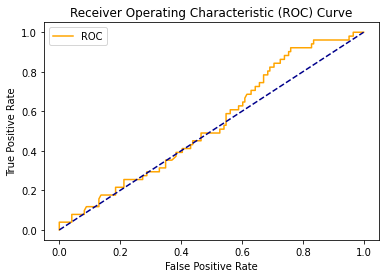

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


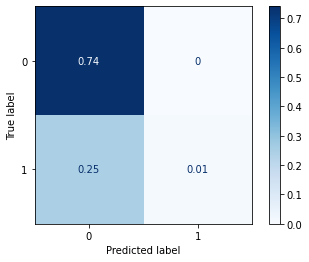

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.6345177664974619
ROC Area under Curve = 0.5173918882621542
Cohen's Kappa = 0.03523330159162019
Time taken = 0.009882688522338867
              precision    recall  f1-score   support

           0    0.75000   0.76027   0.75510       146
           1    0.28571   0.27451   0.28000        51

    accuracy                        0.63452       197
   macro avg    0.51786   0.51739   0.51755       197
weighted avg    0.62980   0.63452   0.63211       197



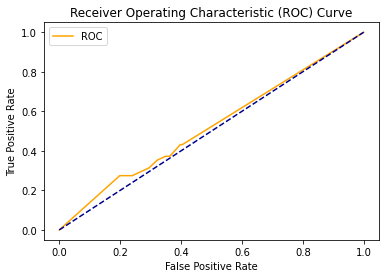

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


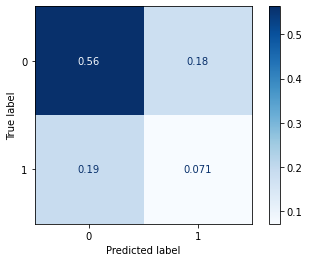

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.7411167512690355
ROC Area under Curve = 0.5
Cohen's Kappa = 0.0
Time taken = 0.05149388313293457
              precision    recall  f1-score   support

           0    0.74112   1.00000   0.85131       146
           1    0.00000   0.00000   0.00000        51

    accuracy                        0.74112       197
   macro avg    0.37056   0.50000   0.42566       197
weighted avg    0.54925   0.74112   0.63092       197



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


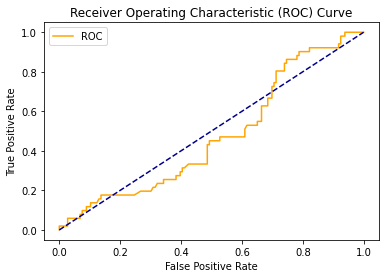

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


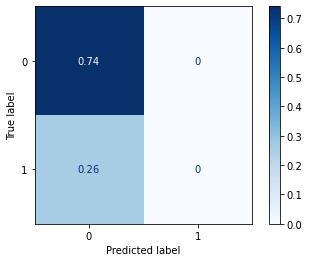

In [ ]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.7309644670050761
ROC Area under Curve = 0.5633225893096965
Cohen's Kappa = 0.15299748519510026
Time taken = 0.04237794876098633
              precision    recall  f1-score   support

           0    0.76879   0.91096   0.83386       146
           1    0.45833   0.21569   0.29333        51

    accuracy                        0.73096       197
   macro avg    0.61356   0.56332   0.56359       197
weighted avg    0.68842   0.73096   0.69392       197



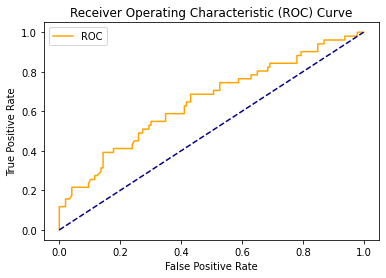

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


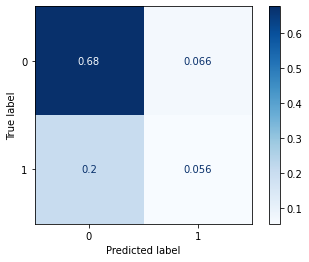

In [ ]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Accuracy = 0.7208121827411168
ROC Area under Curve = 0.5692318023099651
Cohen's Kappa = 0.15988214313406213
Time taken = 36.19434690475464
              precision    recall  f1-score   support

           0    0.77246   0.88356   0.82428       146
           1    0.43333   0.25490   0.32099        51

    accuracy                        0.72081       197
   macro avg    0.60289   0.56923   0.57263       197
weighted avg    0.68466   0.72081   0.69399       197



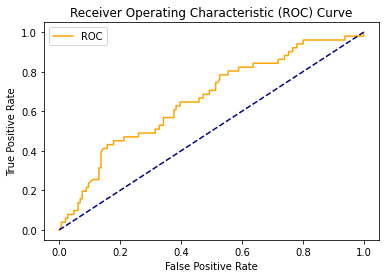

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


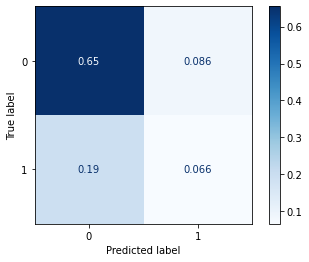

In [ ]:
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

Accuracy = 0.6345177664974619
ROC Area under Curve = 0.5429089443996777
Cohen's Kappa = 0.08265424912689168
Time taken = 0.6235141754150391
              precision    recall  f1-score   support

           0    0.76429   0.73288   0.74825       146
           1    0.31579   0.35294   0.33333        51

    accuracy                        0.63452       197
   macro avg    0.54004   0.54291   0.54079       197
weighted avg    0.64818   0.63452   0.64084       197



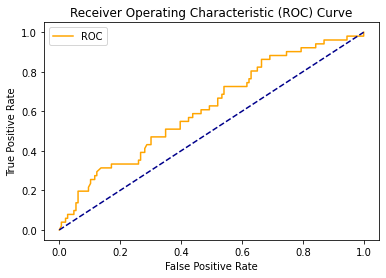

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


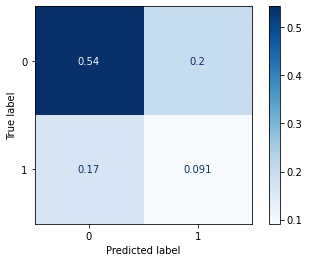

In [ ]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

Accuracy = 0.7461928934010152
ROC Area under Curve = 0.5225624496373892
Cohen's Kappa = 0.0638661851359057
Time taken = 0.20700502395629883
              precision    recall  f1-score   support

           0    0.75000   0.98630   0.85207       146
           1    0.60000   0.05882   0.10714        51

    accuracy                        0.74619       197
   macro avg    0.67500   0.52256   0.47961       197
weighted avg    0.71117   0.74619   0.65922       197



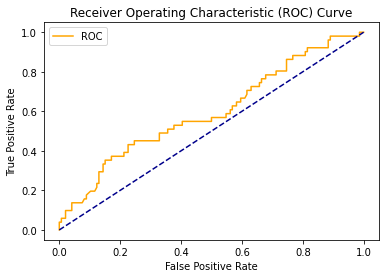

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


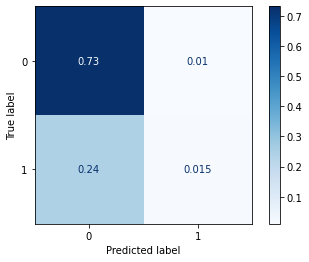

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 5,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

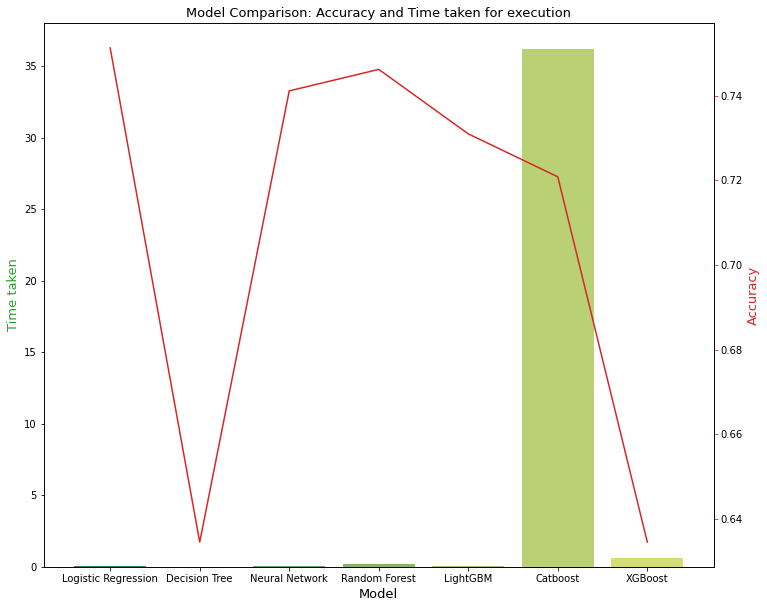

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [ ]:
!pip install micromlgen
from micromlgen import port

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(port(model_lr))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class LogisticRegression {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float votes[2] = { 0.0  };
                        votes[0] += dot(x,   0.025461753024  , 0.068832920464  , -0.075132673853  , 0.025237738801  , -0.007624220633 );
                        // return argmax of votes
                        uint8_t classIdx = 0;
                        float maxVotes = votes[0];

                        for (uint8_t i = 1; i < 2; i++) {
                            if (votes[i] > maxVotes) {
                                classIdx = i;
                                maxVotes = votes[i];
                            }
                        }

                        return classIdx;
                    }

                protecte

In [ ]:
prediction =model_lr.predict(X_test)
print(prediction)

prediction11=model_lr.predict([[ 26.2,91.27 ,1.0 , 6.2 ,1011.6]])
print(prediction11)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(port(model_dt))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[0] <= 27.34999942779541) {
                            if (x[3] <= 15.099999904632568) {
                                if (x[4] <= 1013.25) {
                                    if (x[4] <= 1012.75) {
                                        if (x[3] <= 0.05000000074505806) {
                                            if (x[1] <= 95.32500076293945) {
                                                return 0;
                                            }

                                            else {
                                                if (x[1] <= 97.92499923706055) {
                                                    return 1;
               

In [ ]:
print(port(model_rf))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[2] = { 0 };
                        // tree #1
                        if (x[0] <= 26.25) {
                            if (x[4] <= 1011.5) {
                                if (x[0] <= 23.84999942779541) {
                                    votes[0] += 1;
                                }

                                else {
                                    if (x[0] <= 24.050000190734863) {
                                        if (x[1] <= 97.81499862670898) {
                                            votes[1] += 1;
                                        }

                                        else {
                                     

In [ ]:
with open('RandomForestRegressor.h', 'w') as file:
  file.write(port(model_rf))

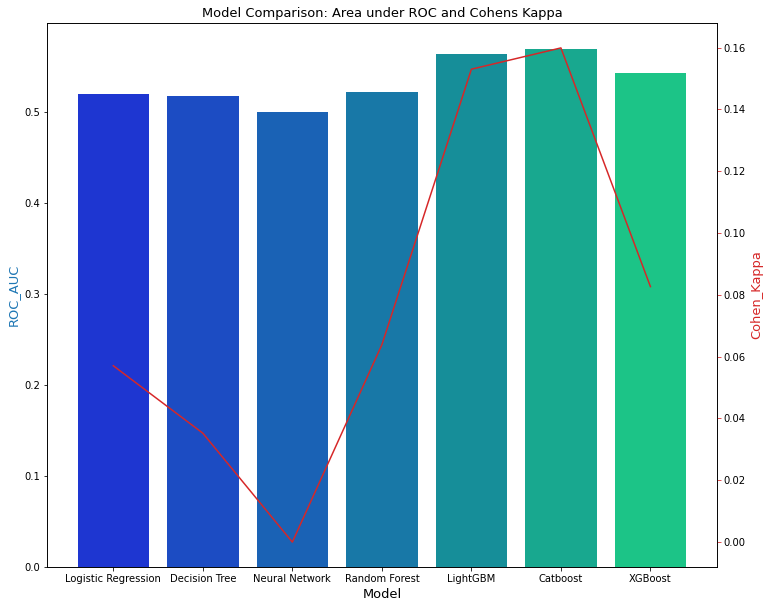

In [ ]:
import seaborn as sns
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()